In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Reading in the data from FRED and storing it in a dataframe
Household_Income_Path = "Resources/Real Median Household Income.csv"
Real_Median_Household_Income = pd.DataFrame(pd.read_csv(Household_Income_Path))
Price_of_a_Home_Path = "Resources/Utah State House Price Index.csv"
Average_Price_of_a_Home = pd.DataFrame(pd.read_csv(Price_of_a_Home_Path))
Population_Path = "Resources/Resident Population in Utah.csv"
Population = pd.DataFrame(pd.read_csv(Population_Path))
Median_Home_Price_Path = "Resources/Median Home Listing Price in Utah.csv"
Median_Home_Price = pd.DataFrame(pd.read_csv(Median_Home_Price_Path))
display(Median_Home_Price.head())
display(Real_Median_Household_Income.head())
display(Average_Price_of_a_Home.head())
display(Population.head())

,DATE,MEDLISPRIUT
0,2016-07-01,325000.0
1,2016-08-01,324950.0
2,2016-09-01,325000.0
3,2016-10-01,326500.0
4,2016-11-01,328925.0


,DATE,MEHOINUSUTA672N
0,1984-01-01,58410
1,1985-01-01,61830
2,1986-01-01,63350
3,1987-01-01,61850
4,1988-01-01,59160


,DATE,UTSTHPI
0,1975-01-01,55.14
1,1975-04-01,58.70
2,1975-07-01,55.16
3,1975-10-01,59.90
4,1976-01-01,61.79


,DATE,UTPOP
0,1900-01-01,277.0
1,1901-01-01,284.0
2,1902-01-01,292.0
3,1903-01-01,299.0
4,1904-01-01,308.0


In [9]:
# Manipulating the Data:

# Change values in DATE column to datetime:
Real_Median_Household_Income['DATE'] = pd.to_datetime(Real_Median_Household_Income['DATE'])
Average_Price_of_a_Home['DATE'] = pd.to_datetime(Average_Price_of_a_Home['DATE'])
Population['DATE'] = pd.to_datetime(Population['DATE'])
Median_Home_Price['DATE'] = pd.to_datetime(Median_Home_Price['DATE'])

# Merge the dataframes on the DATE column:
merged_df_2_of_3 = pd.merge(Population, Average_Price_of_a_Home, on="DATE", how="outer")
merged_df_3_of_3 = pd.merge(merged_df_2_of_3, Median_Home_Price, on="DATE", how="outer")
merged_df = pd.merge(merged_df_3_of_3, Real_Median_Household_Income, on="DATE", how="outer")

#Reanme the columns:
merged_df = merged_df.rename(columns={"DATE":"ds", "MEDLISPRIUT":"Median Home Price in Thousands of Dollars", "UTPOP":"Population in Thousands", "UTSTHPI":"House Price Index in Percentage of 1980 Median Home Price", "MEHOINUSUTA672N":"Median Household Income Per Year in Thousands of Dollars"})

# Display the dataframe:
display(merged_df.head())

# Drop the rows with NaN values:
condensed_df = merged_df.dropna()

# Reset the index:
condensed_df = condensed_df.reset_index(drop=True)

# Display the dataframe:
display(condensed_df.head())

# Drop the column ds and store in a new dataframe:
filled_df = merged_df.drop(columns="ds")

# Reset the index:
filled_df = filled_df.reset_index(drop=True)

# Display the dataframe:
display(filled_df.head())

# Fill in the NaN values with the rolling mean: 
filled_df = filled_df.fillna(filled_df.rolling(5, min_periods=1).mean())

# Add the ds column back to the dataframe and set it as the first column:
filled_df.insert(0, "ds", merged_df["ds"])

# Drop all values before January 1, 2000:
filled_df = filled_df[~(filled_df['ds'] < '2000-01-01')]
filled_df = filled_df.reset_index(drop=True)

# Display the dataframe:
display(filled_df.head())

# Save the dataframe to a csv file:
filled_df.to_csv("Resources/filled_df.csv", index=False, header=True)

# Display the dataframe:
display(filled_df)


,ds,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Home Price in Thousands of Dollars,Median Household Income Per Year in Thousands of Dollars
0,1900-01-01,277.0,NaN,NaN,NaN
1,1901-01-01,284.0,NaN,NaN,NaN
2,1902-01-01,292.0,NaN,NaN,NaN
3,1903-01-01,299.0,NaN,NaN,NaN
4,1904-01-01,308.0,NaN,NaN,NaN


,ds,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Home Price in Thousands of Dollars,Median Household Income Per Year in Thousands of Dollars
0,2017-01-01,3103.540,412.89,337500.0,82290.0
1,2018-01-01,3155.153,451.56,362450.0,89080.0
2,2019-01-01,3203.383,490.91,386523.0,96270.0
3,2020-01-01,3283.982,523.29,423690.0,94680.0
4,2021-01-01,3339.284,587.66,549000.0,94510.0


,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Home Price in Thousands of Dollars,Median Household Income Per Year in Thousands of Dollars
0,277.0,NaN,NaN,NaN
1,284.0,NaN,NaN,NaN
2,292.0,NaN,NaN,NaN
3,299.0,NaN,NaN,NaN
4,308.0,NaN,NaN,NaN


,ds,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Home Price in Thousands of Dollars,Median Household Income Per Year in Thousands of Dollars
0,2000-01-01,2244.502,236.63,NaN,76410.0
1,2001-01-01,2283.715,247.88,NaN,74400.0
2,2002-01-01,2324.815,250.82,NaN,74280.0
3,2003-01-01,2360.137,255.45,NaN,74920.0
4,2004-01-01,2401.580,259.81,NaN,75460.0


,ds,Population in Thousands,House Price Index in Percentage of 1980 Median Home Price,Median Home Price in Thousands of Dollars,Median Household Income Per Year in Thousands of Dollars
0,2000-01-01,2244.502,236.63,NaN,76410.0
1,2001-01-01,2283.715,247.88,NaN,74400.0
2,2002-01-01,2324.815,250.82,NaN,74280.0
3,2003-01-01,2360.137,255.45,NaN,74920.0
4,2004-01-01,2401.580,259.81,NaN,75460.0
...,...,...,...,...,...
151,2023-08-01,NaN,NaN,612220.0,NaN
152,2023-09-01,NaN,NaN,600000.0,NaN
153,2023-10-01,NaN,NaN,599000.0,NaN
154,2023-11-01,NaN,NaN,597000.0,NaN


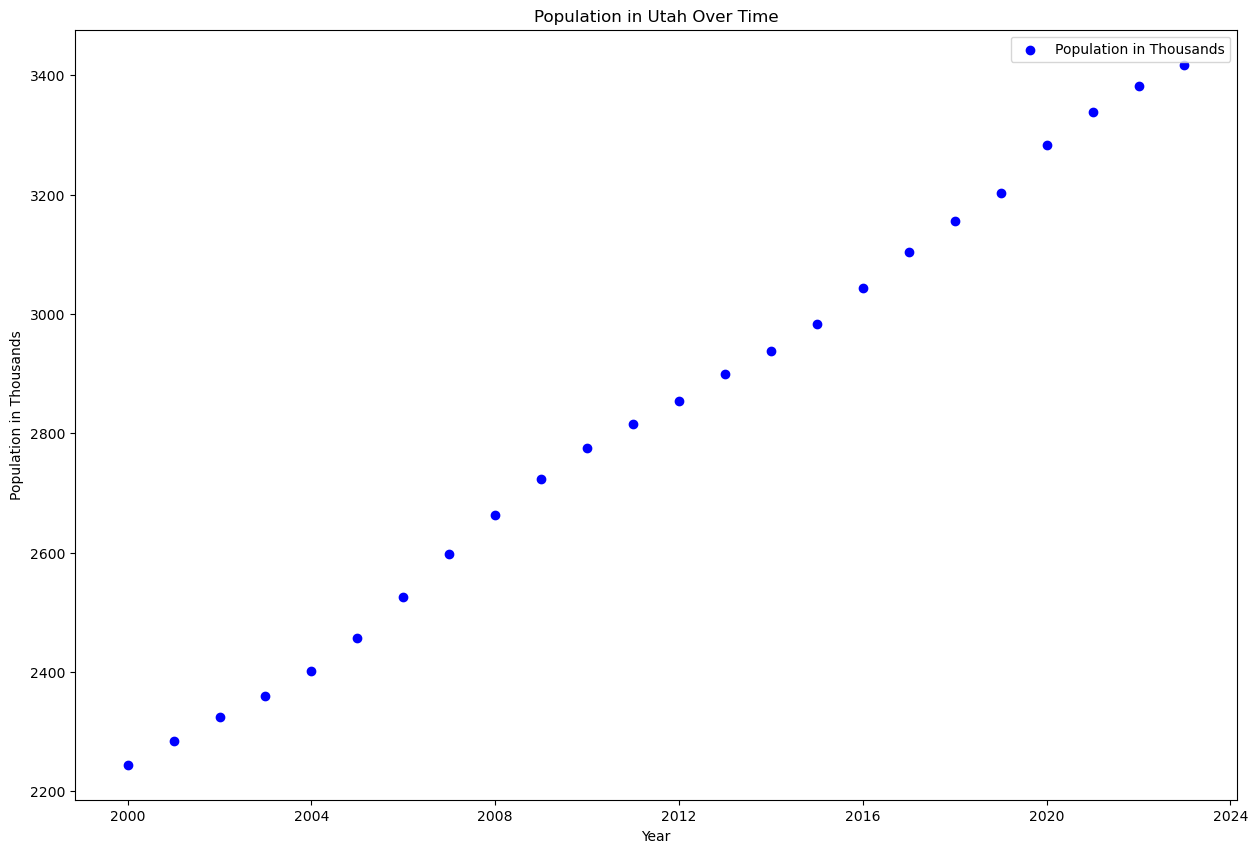

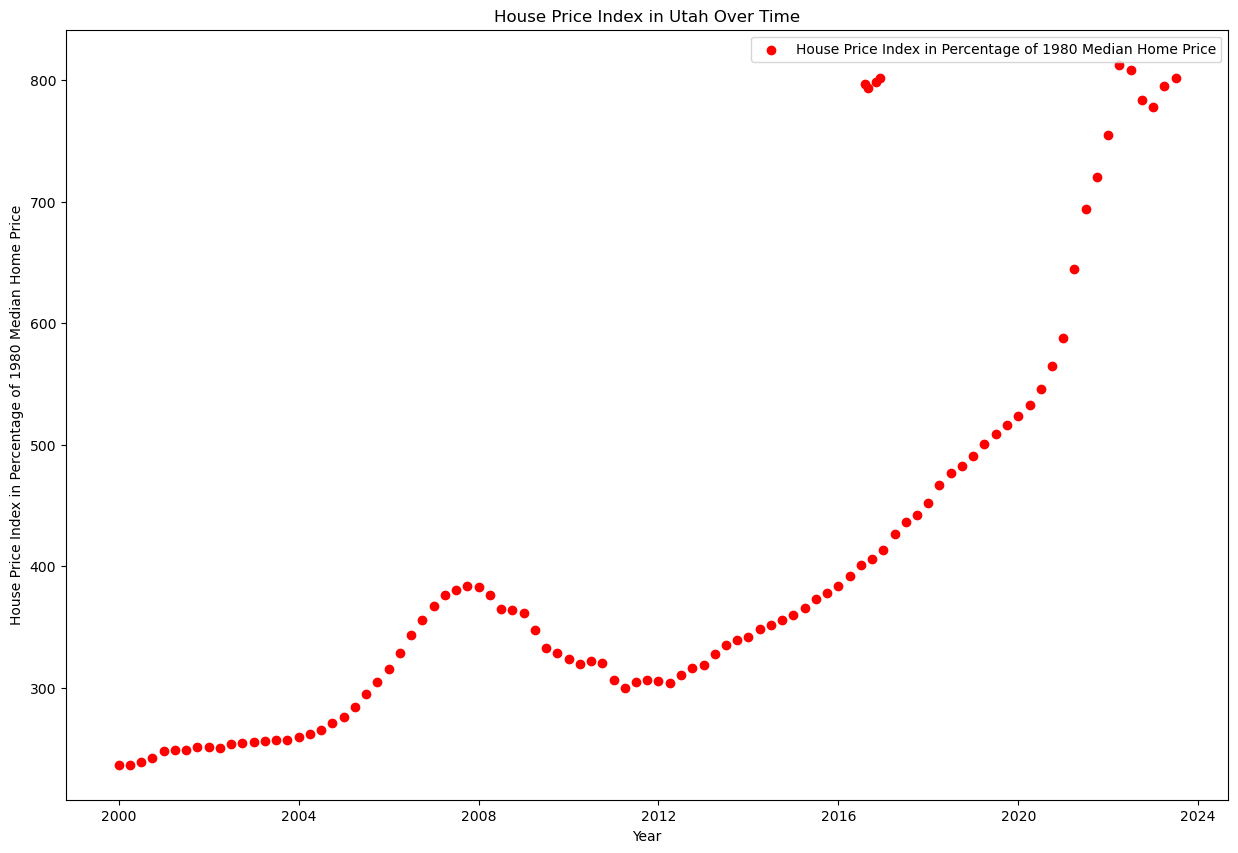

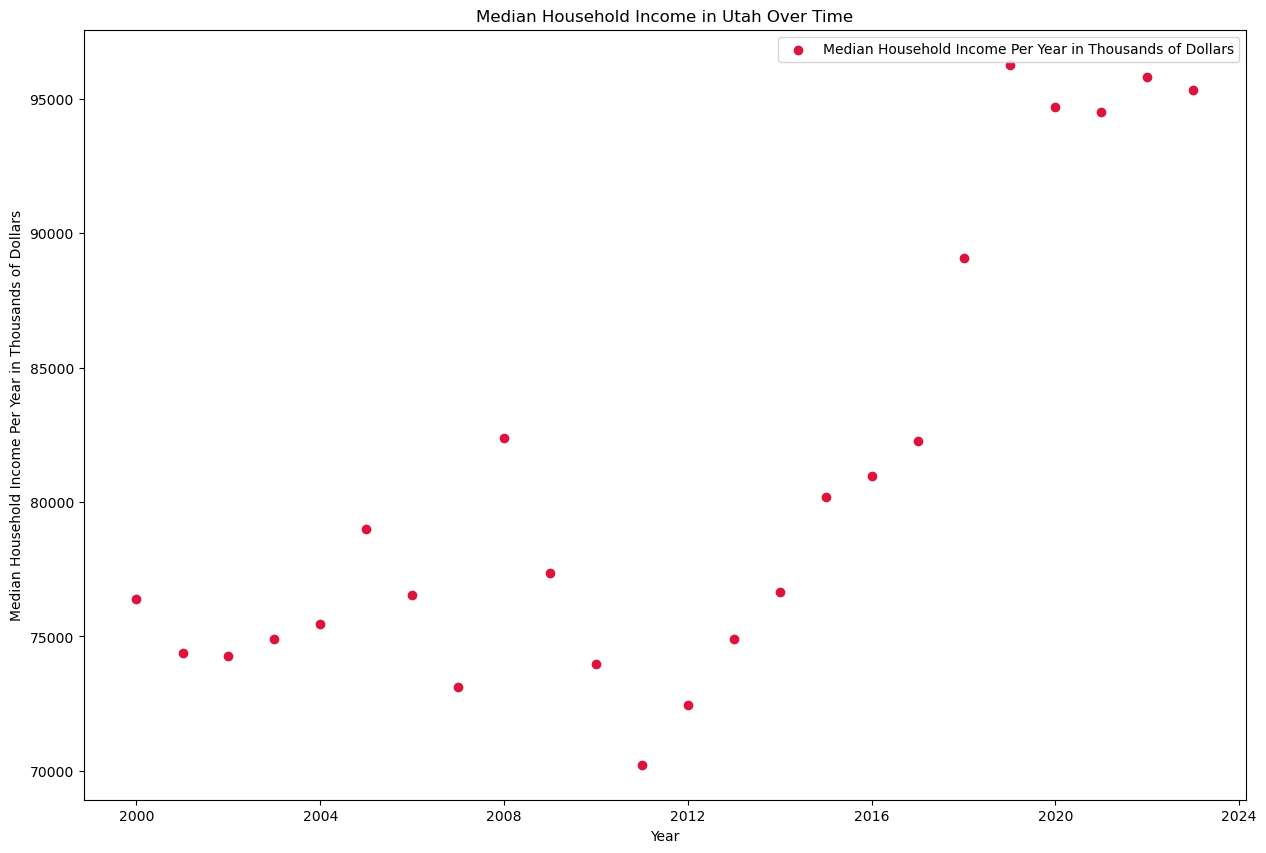

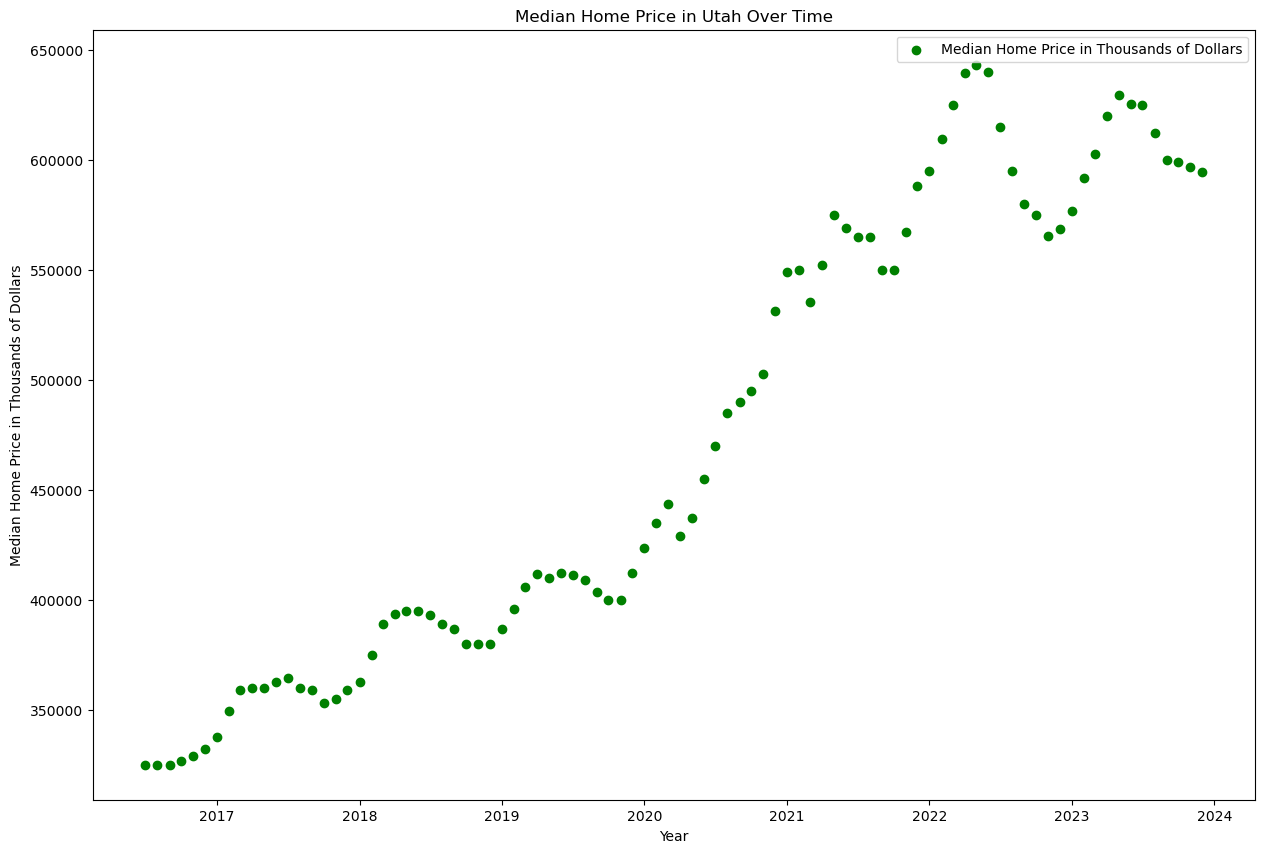

In [11]:
# Visualizing the Data:

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['Population in Thousands'], color='blue', label='Population in Thousands')
plt.title('Population in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.legend()
plt.show()

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['House Price Index in Percentage of 1980 Median Home Price'], color='red', label='House Price Index in Percentage of 1980 Median Home Price')
plt.title('House Price Index in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('House Price Index in Percentage of 1980 Median Home Price')
plt.legend()
plt.show()

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['Median Household Income Per Year in Thousands of Dollars'], color='crimson', label='Median Household Income Per Year in Thousands of Dollars')
plt.title('Median Household Income in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income Per Year in Thousands of Dollars')
plt.legend()
plt.show()

# Plot the data as a scatter plot:
plt.figure(figsize=(15, 10))
plt.scatter(filled_df['ds'], filled_df['Median Home Price in Thousands of Dollars'], color='green', label='Median Home Price in Thousands of Dollars')
plt.title('Median Home Price in Utah Over Time')
plt.xlabel('Year')
plt.ylabel('Median Home Price in Thousands of Dollars')
plt.legend()
plt.show()